# Flights Data Exploration Challenge

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [1]:
import pandas as pd

df_flights = pd.read_csv('data/flights.csv')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    - Identify any null or missing data, and impute appropriate replacement values.
    - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.
    - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - *What are the average (mean) departure and arrival delays?*
        - *How do the carriers compare in terms of arrival delay performance?*
        - *Is there a noticable difference in arrival delays for different days of the week?*
        - *Which departure airport has the highest average departure delay?*
        - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [01 - Flights Challenge.ipynb](01%20-%20Flights%20Solution.ipynb).

In [16]:
# check for null data
df_flights.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

In [24]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271940 entries, 0 to 271939
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               271940 non-null  int64  
 1   Month              271940 non-null  int64  
 2   DayofMonth         271940 non-null  int64  
 3   DayOfWeek          271940 non-null  int64  
 4   Carrier            271940 non-null  object 
 5   OriginAirportID    271940 non-null  int64  
 6   OriginAirportName  271940 non-null  object 
 7   OriginCity         271940 non-null  object 
 8   OriginState        271940 non-null  object 
 9   DestAirportID      271940 non-null  int64  
 10  DestAirportName    271940 non-null  object 
 11  DestCity           271940 non-null  object 
 12  DestState          271940 non-null  object 
 13  CRSDepTime         271940 non-null  int64  
 14  DepDelay           271940 non-null  int64  
 15  DepDel15           269179 non-null  float64
 16  CR

In [25]:
df_flights.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

In [26]:
df_flight_0 = df_flights[df_flights.DepDel15 == 0]
dep_delay_min_0 = df_flight_0.DepDelay.min()
dep_delay_max_0 = df_flight_0.DepDelay.max()

df_flight_1 = df_flights[df_flights.DepDel15 == 1]
dep_delay_min_1 = df_flight_1.DepDelay.min()
dep_delay_max_1 = df_flight_1.DepDelay.max()

print("The minimum and maximum departure delay for flights with DepDel15 == 0 are {} and {}, respectively.".format(dep_delay_min_0, dep_delay_max_0))
print("The minimum and maximum departure delay for flights with DepDel15 == 1 are {} and {}, respectively.".format(dep_delay_min_1, dep_delay_max_1))

The minimum and maximum departure delay for flights with DepDel15 == 0 are -63 and 14, respectively.
The minimum and maximum departure delay for flights with DepDel15 == 1 are 15 and 1425, respectively.


In [30]:
# fill na values of DepDel15 with 0 if DepDelay < 15 and 1 if DepDelay >= 15
df_flights.DepDel15.fillna(df_flights.DepDelay >= 15, inplace = True)

df_flights.isnull().sum()


Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt

C:\Users\evogt\AppData\Local\Temp\ipykernel_4216\4073906994.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


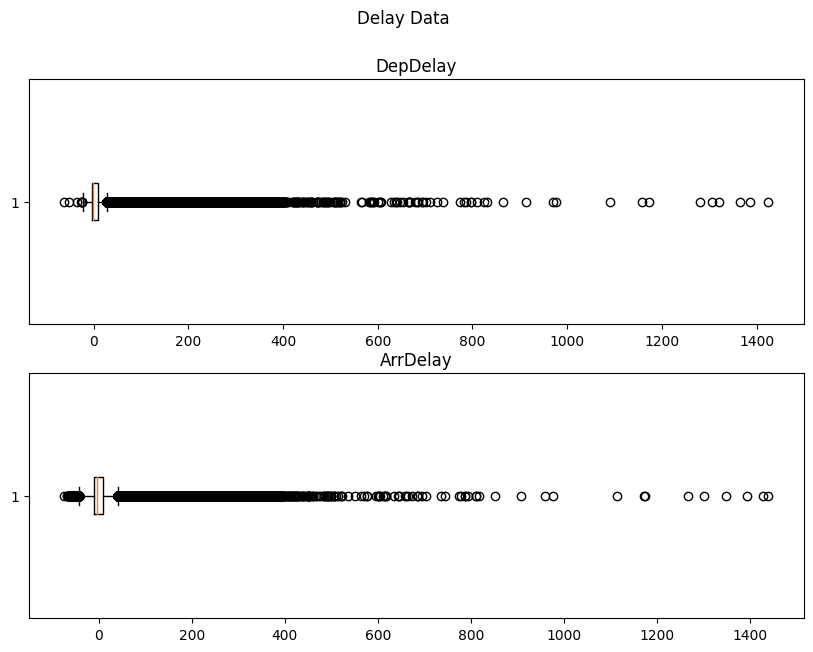

In [50]:
#find outliers of DepDelay and ArrDelay
def show_whiskers(data):
    figure, plots = plt.subplots(2, 1, figsize=(10,7))

    plots[0].boxplot(data.DepDelay, vert=False)
    plots[0].set_title('DepDelay')

    plots[1].boxplot(data.ArrDelay, vert=False)
    plots[1].set_title('ArrDelay')

    figure.suptitle('Delay Data')

    figure.show()

show_whiskers(df_flights)

C:\Users\evogt\AppData\Local\Temp\ipykernel_4216\4073906994.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


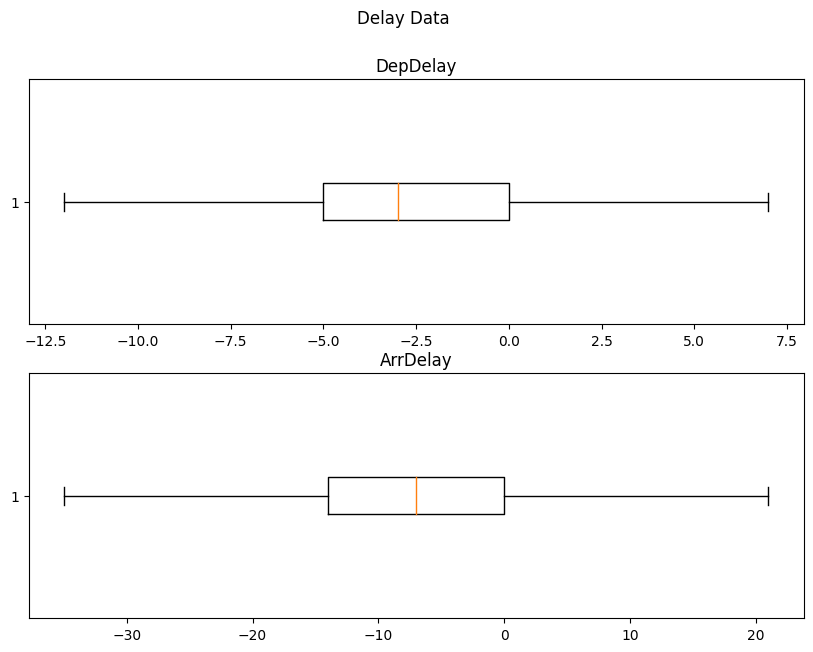

In [97]:
def remove_outliers(column, cut_percentage_bottom, cut_percentage_top):
    cut_percentage_bottom = cut_percentage_bottom / 100
    cut_percentage_top = cut_percentage_top / 100
    lowest_percentile = column.quantile(cut_percentage_bottom)
    highest_percentile = column.quantile(1 - cut_percentage_top)
    column_sanitized = column
    column_sanitized = column_sanitized[column_sanitized > lowest_percentile]
    column_sanitized = column_sanitized[column_sanitized < highest_percentile]
    return column_sanitized

dep_delay_no_outliers = remove_outliers(df_flights.DepDelay, 0.4,26)
arr_delay_no_outliers = remove_outliers(df_flights.ArrDelay, 0.6,15.5)

df_flights_no_outliers = df_flights.copy()
df_flights_no_outliers.DepDelay = dep_delay_no_outliers
df_flights_no_outliers.ArrDelay = arr_delay_no_outliers

df_flights_no_outliers.dropna(axis=0, how='any', inplace=True)

show_whiskers(df_flights_no_outliers)

Explore the cleaned data.
- View summary statistics for the numeric fields in the dataset.
- Determine the distribution of the **DepDelay** and **ArrDelay** columns.
- Use statistics, aggregate functions, and visualizations to answer the following questions:
    - *What are the average (mean) departure and arrival delays?*
    - *How do the carriers compare in terms of arrival delay performance?*
    - *Is there a noticable difference in arrival delays for different days of the week?*
    - *Which departure airport has the highest average departure delay?*
    - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
    - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
    - *Which route has the highest average arrival delay?*

Minimum:-12.00
Mean:-2.49
Median:-3.00
Mode:-3.00
Maximum:7.00

Minimum:-35.00
Mean:-7.09
Median:-7.00
Mode:0.00
Maximum:21.00



C:\Users\evogt\AppData\Local\Temp\ipykernel_4216\2495253821.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\evogt\AppData\Local\Temp\ipykernel_4216\2495253821.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


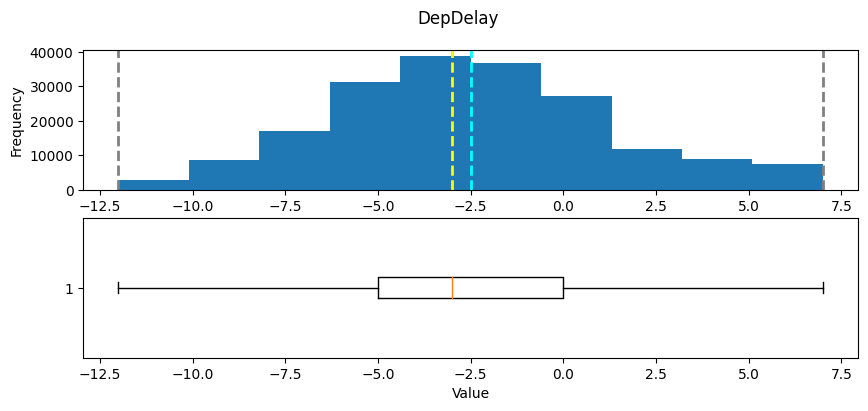

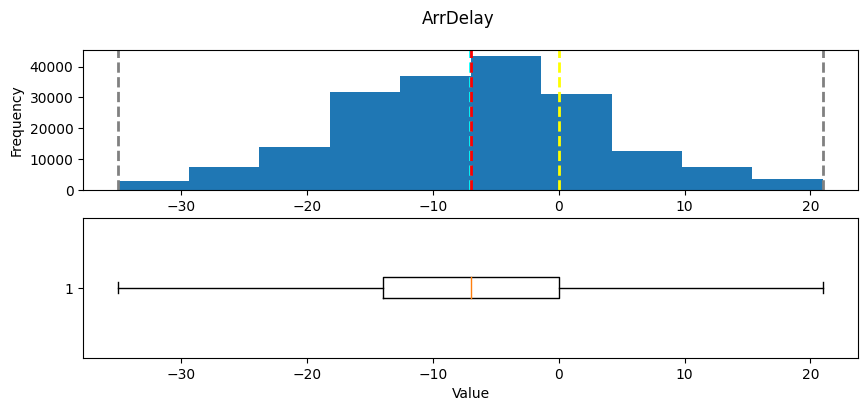

In [100]:
def show_distribution(var_data, title):
    '''
    This function will make a distribution (graph) and display it
    '''

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle(title)

    # Show the figure
    fig.show()

show_distribution(df_flights_no_outliers.DepDelay, "DepDelay")
show_distribution(df_flights_no_outliers.ArrDelay, "ArrDelay")

In [105]:
df_flights_no_outliers.groupby(['Carrier'])[['DepDelay', 'ArrDelay']].mean().sort_values(by='ArrDelay', ascending=False)

,DepDelay,ArrDelay
Carrier,,
F9,-2.606163,-2.842127
HA,-3.740181,-3.325680
AS,-4.125523,-5.163544
WN,-0.258334,-5.227511
YV,-3.714507,-5.385390
US,-3.457640,-5.802842
OO,-3.712964,-5.816337
FL,-2.265928,-6.301686
MQ,-3.232583,-6.474911


In [108]:
df_flights_no_outliers.groupby(['DayOfWeek'])['ArrDelay'].mean().sort_values(ascending=False)

DayOfWeek
4   -6.211872
5   -6.673042
3   -6.803301
1   -7.004165
2   -7.385659
7   -7.514769
6   -8.132356
Name: ArrDelay, dtype: float64

In [110]:
df_flights_no_outliers.groupby(['OriginAirportName'])['DepDelay'].mean().sort_values(ascending=False)

OriginAirportName
Dallas Love Field                     -0.030032
Chicago Midway International          -0.336466
William P Hobby                       -0.627594
Metropolitan Oakland International    -0.951977
Dallas/Fort Worth International       -1.199612
                                         ...   
Southwest Florida International       -3.988285
Long Beach Airport                    -4.193362
Tucson International                  -4.240783
Ted Stevens Anchorage International   -4.337209
Richmond International                -4.498874
Name: DepDelay, Length: 70, dtype: float64

In [111]:
df_flights_no_outliers.DepDelay.corr(df_flights_no_outliers.ArrDelay)

0.3220655566598924

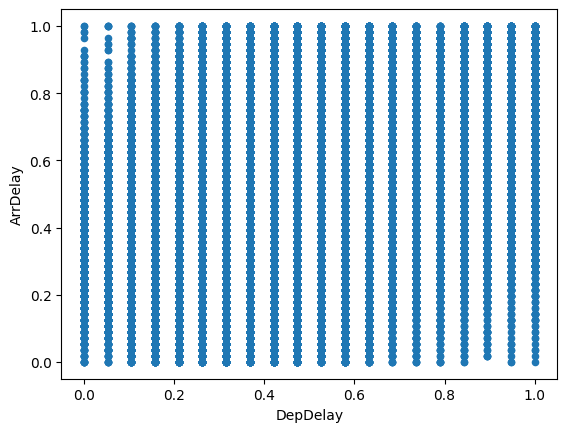

In [115]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_flights_normalized = df_flights_no_outliers.copy()

df_flights_normalized[['DepDelay', 'ArrDelay']] = scaler.fit_transform(df_flights_no_outliers[['DepDelay', 'ArrDelay']])

df_flights_normalized.plot.scatter(x='DepDelay', y='ArrDelay')


plt.show()

In [127]:
df_flights_no_outliers['Route'] = df_flights_no_outliers.apply(lambda x: f"{x['OriginAirportName']} - {x['DestAirportName']}", axis=1)

In [135]:
df_flights_no_outliers.where(df_flights_no_outliers['ArrDelay'] > 0).groupby(['Route'])['ArrDelay'].count().sort_values(ascending=False)

Route
Kahului Airport - Honolulu International                                     193
Honolulu International - Kahului Airport                                     165
San Francisco International - Los Angeles International                      162
Seattle/Tacoma International - Los Angeles International                     133
Los Angeles International - San Francisco International                      122
                                                                            ... 
Louisville International-Standiford Field - John F. Kennedy International      1
Port Columbus International - Raleigh-Durham International                     1
Louisville International-Standiford Field - McCarran International             1
Louisville International-Standiford Field - Tampa International                1
Jacksonville International - Cincinnati/Northern Kentucky International        1
Name: ArrDelay, Length: 2385, dtype: int64

In [136]:
df_flights_no_outliers.groupby(['Route'])['ArrDelay'].mean().sort_values(ascending=False)


Route
John F. Kennedy International - Louisville International-Standiford Field    18.000000
Cleveland-Hopkins International - Palm Beach International                   18.000000
McCarran International - Louisville International-Standiford Field            9.800000
Cleveland-Hopkins International - Philadelphia International                  8.200000
Sacramento International - Philadelphia International                         8.000000
                                                                               ...    
Chicago Midway International - John Wayne Airport-Orange County             -21.500000
John F. Kennedy International - San Antonio International                   -22.181818
Denver International - Kahului Airport                                      -25.500000
Indianapolis International - Logan International                            -26.000000
Jacksonville International - Chicago Midway International                   -28.250000
Name: ArrDelay, Length: 2475, dtype: 